Venkatesh's Jupyter Notebook for Project One

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint


csv_path = "US_youtube_trending_data.csv"

# Import the books.csv file as a DataFrame
US_data_df = pd.read_csv("US_youtube_trending_data.csv", encoding="utf-8")
US_data_df.head()
GB_data_df = pd.read_csv("GB_youtube_trending_data.csv", encoding="utf-8")
GB_data_df.head()
IN_data_df = pd.read_csv("IN_youtube_trending_data.csv", encoding="utf-8")
IN_data_df.head()
CA_data_df = pd.read_csv("CA_youtube_trending_data.csv", encoding="utf-8")
CA_data_df.head()


#youtube_cat_df = pd.read_csv("YouTubeCategories.csv", encoding="utf-8")
#US_data_df.dtypes

#US_data_df.value_counts()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
import json
from pprint import pprint
US_category_file=open("US_category_id.json")
US_data = json.load(US_category_file)
#pprint(data)
#pprint(data["items"][0])
#print()
categoryId=[]
categoryName=[]

for i in range (len(US_data["items"])):
#        pprint(data["items"][i])
        categoryId.append(US_data["items"][i]["id"])
        categoryName.append(US_data["items"][i]["snippet"]["title"])
print(categoryId)
print(categoryName)
US_youtube_cat_df = pd.DataFrame({"CategoryId":categoryId,"categoryName":categoryName})
US_youtube_cat_df["categoryId"]=US_youtube_cat_df["CategoryId"].astype("int64")
US_youtube_cat_df=US_youtube_cat_df[["categoryId","categoryName"]]
US_youtube_cat_df

['1', '2', '10', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']
['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


,categoryId,categoryName
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [7]:
US_youtube_cat_df.dtypes
US_data_df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [8]:
US_youtube_cat_df2 = US_youtube_cat_df.set_index("categoryId")
US_youtube_cat_df2

,categoryName
categoryId,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging


In [9]:
US_Merged_data_df= US_data_df.merge(US_youtube_cat_df2, how="outer",on="categoryId")
US_Merged_data_df.head()
#US_Merged_data_df.dtypes
US_Merged_data_df["categoryName"].value_counts()

Entertainment            17753
Music                    16648
Gaming                   14687
Sports                    9662
People & Blogs            7587
Comedy                    4785
Film & Animation          3394
News & Politics           3320
Science & Technology      3226
Howto & Style             2942
Education                 1899
Autos & Vehicles          1569
Pets & Animals             476
Travel & Events            359
Nonprofits & Activism       85
Classics                     1
Foreign                      1
Sci-Fi/Fantasy               1
Action/Adventure             1
Family                       1
Short Movies                 1
Shorts                       1
Documentary                  1
Trailers                     1
Drama                        1
Movies                       1
Videoblogging                1
Anime/Animation              1
Horror                       1
Shows                        1
Thriller                     1
Name: categoryName, dtype: int64

In [10]:
CA_Merged_data_df= CA_data_df.merge(US_youtube_cat_df2, how="outer",on="categoryId")
CA_Merged_data_df.head()
#US_Merged_data_df.dtypes
print("CA Counts")
print(CA_Merged_data_df["categoryName"].value_counts())

IN_Merged_data_df= IN_data_df.merge(US_youtube_cat_df2, how="outer",on="categoryId")
IN_Merged_data_df.head()
#US_Merged_data_df.dtypes
IN_Merged_data_df["categoryName"].value_counts()
print("IN Counts")
print(IN_Merged_data_df["categoryName"].value_counts())

GB_Merged_data_df= GB_data_df.merge(US_youtube_cat_df2, how="outer",on="categoryId")
GB_Merged_data_df.head()
#US_Merged_data_df.dtypes
GB_Merged_data_df["categoryName"].value_counts()
print("GB Counts")
print(GB_Merged_data_df["categoryName"].value_counts())


CA Counts
Entertainment            18679
Gaming                   14330
Music                    12554
Sports                   10568
People & Blogs            7941
Comedy                    5653
Science & Technology      3618
Howto & Style             3450
News & Politics           3277
Film & Animation          2863
Education                 2350
Autos & Vehicles          1871
Travel & Events            578
Pets & Animals             533
Nonprofits & Activism       80
Foreign                      1
Classics                     1
Sci-Fi/Fantasy               1
Action/Adventure             1
Family                       1
Short Movies                 1
Shorts                       1
Documentary                  1
Trailers                     1
Drama                        1
Movies                       1
Videoblogging                1
Anime/Animation              1
Horror                       1
Shows                        1
Thriller                     1
Name: categoryName, dtype: in

In [11]:
#youtube_cat_df.drop_index()
#youtube_cat_df.set_index("CategoryID")
#youtube_cat_df.reset_index()
#youtube_cat_df.groupby(["CategoryID"])
#youtube_cat_df["CatID"]=youtube_cat_df["CategoryID"].astype("object")
#youtube_cat_df.dtypes

In [12]:
US_data_df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [13]:
US_Merged_data_df.to_csv("US_Merged_data.csv")

In [14]:
CA_Merged_data_df.to_csv("CA_Merged_data.csv")
GB_Merged_data_df.to_csv("GB_Merged_data.csv")
IN_Merged_data_df.to_csv("IN_Merged_data.csv")

In [15]:
US_Merged_data_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908.0,5855.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036.0,87111.0,1860.0,7052.0,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11T17:00:31Z,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12T00:00:00Z,smosh|smosh pit|smosh games|funny|comedy,591837.0,44168.0,409.0,2652.0,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11T22:00:05Z,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12T00:00:00Z,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955.0,4511.0,69.0,673.0,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11T23:00:06Z,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12T00:00:00Z,farming|family farm|agriculture|agriculture jo...,277338.0,37533.0,197.0,3666.0,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88403,NaN,NaN,NaN,NaN,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sci-Fi/Fantasy
88404,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thriller
88405,NaN,NaN,NaN,NaN,NaN,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shorts
88406,NaN,NaN,NaN,NaN,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shows


In [16]:
US_Merged_data_df["Country"]="US"
CA_Merged_data_df["Country"]="CA"
IN_Merged_data_df["Country"]="IN"
GB_Merged_data_df["Country"]="GB"
All_Countries=[US_Merged_data_df,CA_Merged_data_df,IN_Merged_data_df,GB_Merged_data_df]
ALL_Merged_data_df=pd.concat(All_Countries)
ALL_Merged_data_df.head()



,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName,Country
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614.0,156908.0,5855.0,35313.0,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,US
1,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11T20:24:34Z,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12T00:00:00Z,[None],940036.0,87111.0,1860.0,7052.0,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,People & Blogs,US
2,nt3VVyv5pxQ,Try Not To Laugh Challenge #51,2020-08-11T17:00:31Z,UCYJPby9DRCteedh5tfxVbrw,Smosh Pit,22,2020-08-12T00:00:00Z,smosh|smosh pit|smosh games|funny|comedy,591837.0,44168.0,409.0,2652.0,https://i.ytimg.com/vi/nt3VVyv5pxQ/default.jpg,False,False,You know what time it is— time to try not to l...,People & Blogs,US
3,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11T22:00:05Z,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12T00:00:00Z,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955.0,4511.0,69.0,673.0,https://i.ytimg.com/vi/BNeDH6UTmXw/default.jpg,False,False,Come hang out me with me for 10 minutes where ...,People & Blogs,US
4,gPdUslndvVI,Our Farm Got Destroyed.,2020-08-11T23:00:06Z,UCuxlXCfVyV-i5YLL30jkomw,Cole The Cornstar,22,2020-08-12T00:00:00Z,farming|family farm|agriculture|agriculture jo...,277338.0,37533.0,197.0,3666.0,https://i.ytimg.com/vi/gPdUslndvVI/default.jpg,False,False,"Wind storm, rain, and lots of destruction; wel...",People & Blogs,US


In [18]:
ALL_Merged_data_df.groupby(["Country","categoryName"]).size()

Country  categoryName    
CA       Action/Adventure       1
         Anime/Animation        1
         Autos & Vehicles    1871
         Classics               1
         Comedy              5653
                             ... 
US       Sports              9662
         Thriller               1
         Trailers               1
         Travel & Events      359
         Videoblogging          1
Length: 124, dtype: int64

In [19]:
ALL_Merged_data_df[ALL_Merged_data_df.groupby('video_id')['video_id'].transform('size') > 50]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName,Country
33941,M9SVC_lIpss,I Customized A School,2021-05-31T21:46:26Z,UClQubH2NeMmGLTLgNdLBwXg,ZHC,24,2021-06-02T00:00:00Z,[None],4240992.0,272569.0,3162.0,36203.0,https://i.ytimg.com/vi/M9SVC_lIpss/default.jpg,False,False,Hope you enjoyed! Subscribe right now and you'...,Entertainment,US
33990,E6E22XQPhhg,Anything You Can Fit In The Triangle I’ll Pay For,2021-06-01T20:00:02Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2021-06-02T00:00:00Z,[None],11031056.0,936626.0,5111.0,57085.0,https://i.ytimg.com/vi/E6E22XQPhhg/default.jpg,False,False,Sorry for the long time no uploads! I had 4 di...,Entertainment,US
33991,M9SVC_lIpss,I Customized A School,2021-05-31T21:46:26Z,UClQubH2NeMmGLTLgNdLBwXg,ZHC,24,2021-06-02T00:00:00Z,[None],5412044.0,325895.0,4103.0,41532.0,https://i.ytimg.com/vi/M9SVC_lIpss/default.jpg,False,False,Hope you enjoyed! Subscribe right now and you'...,Entertainment,US
34040,E6E22XQPhhg,Anything You Can Fit In The Triangle I’ll Pay For,2021-06-01T20:00:02Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2021-06-03T00:00:00Z,[None],15629442.0,1147776.0,7707.0,63912.0,https://i.ytimg.com/vi/E6E22XQPhhg/default.jpg,False,False,Sorry for the long time no uploads! I had 4 di...,Entertainment,US
34042,M9SVC_lIpss,I Customized A School,2021-05-31T21:46:26Z,UClQubH2NeMmGLTLgNdLBwXg,ZHC,24,2021-06-03T00:00:00Z,[None],7679811.0,420671.0,5686.0,50786.0,https://i.ytimg.com/vi/M9SVC_lIpss/default.jpg,False,False,Hope you enjoyed! Subscribe right now and you'...,Entertainment,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68403,aONT7atzqfw,Floyd Mayweather vs Logan Paul: Fight goes the...,2021-06-07T05:40:56Z,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2021-06-13T00:00:00Z,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,15867856.0,140094.0,21915.0,26505.0,https://i.ytimg.com/vi/aONT7atzqfw/default.jpg,False,False,Watch the highlight from the Mayweather-Paul b...,Sports,GB
68441,aONT7atzqfw,Floyd Mayweather vs Logan Paul: Fight goes the...,2021-06-07T05:40:56Z,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2021-06-14T00:00:00Z,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,15963978.0,140667.0,22002.0,26540.0,https://i.ytimg.com/vi/aONT7atzqfw/default.jpg,False,False,Watch the highlight from the Mayweather-Paul b...,Sports,GB
68475,aONT7atzqfw,Floyd Mayweather vs Logan Paul: Fight goes the...,2021-06-07T05:40:56Z,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2021-06-14T00:00:00Z,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,16015241.0,141051.0,22082.0,26587.0,https://i.ytimg.com/vi/aONT7atzqfw/default.jpg,False,False,Watch the highlight from the Mayweather-Paul b...,Sports,GB
68506,aONT7atzqfw,Floyd Mayweather vs Logan Paul: Fight goes the...,2021-06-07T05:40:56Z,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2021-06-15T00:00:00Z,CBS|CBS Sports|sports|cbs sports hq|sports hq|...,16084371.0,141528.0,22181.0,26620.0,https://i.ytimg.com/vi/aONT7atzqfw/default.jpg,False,False,Watch the highlight from the Mayweather-Paul b...,Sports,GB


In [20]:
ALL_Merged_data_df[ALL_Merged_data_df["video_id"]=="zzk09ESX7e0"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,categoryName,Country
51732,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-03T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,1325906.0,313962.0,914.0,43991.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51766,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-03T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,2296060.0,360462.0,1468.0,51551.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51806,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-04T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,3340184.0,402591.0,1905.0,58060.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51834,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-04T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,4980810.0,427173.0,2252.0,62094.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51871,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-05T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,5671761.0,452770.0,2499.0,65318.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51904,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-05T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,6733063.0,473641.0,2782.0,67383.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51939,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-06T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,7414718.0,494729.0,2913.0,69267.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
51972,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-06T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,8366952.0,510802.0,3024.0,70871.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
52004,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-07T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,8688066.0,527256.0,3101.0,72060.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US
52037,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02T09:00:10Z,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-07T00:00:00Z,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,8852704.0,542538.0,3160.0,73305.0,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,Music,US


In [103]:
ALL_Merged_data_df.groupby(["video_id","trending_date","publishedAt"]).count()

title  channelId  \
video_id    trending_date        publishedAt                              
--0bCF-iK2E 2021-07-04T00:00:00Z 2021-07-01T10:00:00Z      1          1   
            2021-07-05T00:00:00Z 2021-07-01T10:00:00Z      1          1   
            2021-07-06T00:00:00Z 2021-07-01T10:00:00Z      1          1   
            2021-07-07T00:00:00Z 2021-07-01T10:00:00Z      1          1   
            2021-07-08T00:00:00Z 2021-07-01T10:00:00Z      1          1   
...                                                      ...        ...   
zzk09ESX7e0 2021-06-06T00:00:00Z 2021-06-02T09:00:10Z      4          4   
            2021-06-07T00:00:00Z 2021-06-02T09:00:10Z      4          4   
            2021-06-08T00:00:00Z 2021-06-02T09:00:10Z      4          4   
            2021-06-09T00:00:00Z 2021-06-02T09:00:10Z      2          2   
zzxPZwaA-8w 2021-05-30T00:00:00Z 2021-05-23T21:00:31Z      1          1   

                                                       channelTitle  \
video_id    trending_date        publishedAt                          
--0bCF-iK2E 2021-07-04T00:00:00Z 2021-07-01T10:00:00Z             1   
            2021-07-05T00:00:00Z 2021-07-01T10:00:00Z             1   
            2021-07-06T00:00:00Z 2021-07-01T10:00:00Z             1   
            2021-07-07T00:00:00Z 2021-07-01T10:00:00Z             1   
            2021-07-08T00:00:00Z 2021-07-01T10:00:00Z             1   
...                                                             ...   
zzk09ESX7e0 2021-06-06T00:00:00Z 2021-06-02T09:00:10Z             4   
            2021-06-07T00:00:00Z 2021-06-02T09:00:10Z             4   
            2021-06-08T00:00:00Z 2021-06-02T09:00:10Z             4   
            2021-06-09T00:00:00Z 2021-06-02T09:00:10Z             2   
zzxPZwaA-8w 2021-05-30T00:00:00Z 2021-05-23T21:00:31Z             1   

                                                       categoryId  tags  \
video_id    trending_date        publishedAt                              
--0bCF-iK2E 2021-07-04T00:00:00Z 2021-07-01T10:00:00Z           1     1   
            2021-07-05T00:00:00Z 2021-07-01T10:00:00Z           1     1   
            2021-07-06T00:00:00Z 2021-07-01T10:00:00Z           1     1   
            2021-07-07T00:00:00Z 2021-07-01T10:00:00Z           1     1   
            2021-07-08T00:00:00Z 2021-07-01T10:00:00Z           1     1   
...                                                           ...   ...   
zzk09ESX7e0 2021-06-06T00:00:00Z 2021-06-02T09:00:10Z           4     4   
            2021-06-07T00:00:00Z 2021-06-02T09:00:10Z           4     4   
            2021-06-08T00:00:00Z 2021-06-02T09:00:10Z           4     4   
            2021-06-09T00:00:00Z 2021-06-02T09:00:10Z           2     2   
zzxPZwaA-8w 2021-05-30T00:00:00Z 2021-05-23T21:00:31Z           1     1   

                                                       view_count  likes  \
video_id    trending_date        publishedAt                               
--0bCF-iK2E 2021-07-04T00:00:00Z 2021-07-01T10:00:00Z           1      1   
            2021-07-05T00:00:00Z 2021-07-01T10:00:00Z           1      1   
            2021-07-06T00:00:00Z 2021-07-01T10:00:00Z           1      1   
            2021-07-07T00:00:00Z 2021-07-01T10:00:00Z           1      1   
            2021-07-08T00:00:00Z 2021-07-01T10:00:00Z           1      1   
...                                                           ...    ...   
zzk09ESX7e0 2021-06-06T00:00:00Z 2021-06-02T09:00:10Z           4      4   
            2021-06-07T00:00:00Z 2021-06-02T09:00:10Z           4      4   
            2021-06-08T00:00:00Z 2021-06-02T09:00:10Z           4      4   
            2021-06-09T00:00:00Z 2021-06-02T09:00:10Z           2      2   
zzxPZwaA-8w 2021-05-30T00:00:00Z 2021-05-23T21:00:31Z           1      1   

                                                       dislikes  \
video_id    trending_date        publishedAt                      
--0bCF-iK2E 2021-07-04T00:00:00Z 2021-07-01T10:00:00Z   

In [21]:
ALL_Merged_data_df.count()

video_id             347949
title                347949
publishedAt          347949
channelId            347949
channelTitle         347948
categoryId           348017
trending_date        347949
tags                 347949
view_count           347949
likes                347949
dislikes             347949
comment_count        347949
thumbnail_link       347949
comments_disabled    347949
ratings_disabled     347949
description          341550
categoryName         348017
Country              348017
dtype: int64

In [22]:
#ALL_Cat_grp=ALL_Merged_data_df.groupby(["Country","categoryName"])
all_cat_agg_df=ALL_Merged_data_df.groupby(["Country","categoryName"]).sum().reset_index()
#all_cat_agg_df=ALL_Cat_grp.sum().reset_index()
all_cat_agg_df[all_cat_agg_df["Country"]=="US"]

,Country,categoryName,categoryId,view_count,likes,dislikes,comment_count
93,US,Action/Adventure,32,0.000000e+00,0.000000e+00,0.0,0.0
94,US,Anime/Animation,31,0.000000e+00,0.000000e+00,0.0,0.0
95,US,Autos & Vehicles,3138,1.786742e+09,8.199079e+07,1295821.0,7128373.0
96,US,Classics,33,0.000000e+00,0.000000e+00,0.0,0.0
97,US,Comedy,110066,7.919213e+09,5.550806e+08,8445045.0,37338031.0
98,US,Documentary,35,0.000000e+00,0.000000e+00,0.0,0.0
99,US,Drama,36,0.000000e+00,0.000000e+00,0.0,0.0
100,US,Education,51273,3.137195e+09,1.787350e+08,3181404.0,14070070.0
101,US,Entertainment,426072,5.964536e+10,2.972876e+09,57916313.0,205631671.0
102,US,Family,37,0.000000e+00,0.000000e+00,0.0,0.0


In [23]:
ALL_Merged_data_df.describe

<bound method NDFrame.describe of           video_id                                 title  \
0      3C66w5Z0ixs    I ASKED HER TO BE MY GIRLFRIEND...   
1      49Z6Mv4_WCA    i don't know what im doing anymore   
2      nt3VVyv5pxQ        Try Not To Laugh Challenge #51   
3      BNeDH6UTmXw  Ten Minutes with Tyler Cameron | Q&A   
4      gPdUslndvVI               Our Farm Got Destroyed.   
...            ...                                   ...   
88407          NaN                                   NaN   
88408          NaN                                   NaN   
88409          NaN                                   NaN   
88410          NaN                                   NaN   
88411          NaN                                   NaN   

                publishedAt                 channelId       channelTitle  \
0      2020-08-11T19:20:14Z  UCvtRTOMP2TqYqu51xNrqAzg           Brawadis   
1      2020-08-11T20:24:34Z  UCtinbF-Q-fVthA0qrFQTgXQ       CaseyNeistat   
2      2020-08-11

In [24]:

country_category = ALL_Merged_data_df.groupby(['Country', 'categoryName']).agg({'view_count': 'sum'})
# Change: groupby state_office and divide by sum
country_pcts = country_category.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_pcts_df=country_pcts.reset_index()
country_pcts_df=country_pcts_df[country_pcts_df["view_count"]>=2]
#ALL_Merged_data_df[ALL_Merged_data_df["video_id"]=="zzk09ESX7e0"]
#country_pcts_df
#country_pcts_sorted_df=country_pcts_df.sort_values("Country","view_count","categoryName")
pivot_df = country_pcts_df.pivot(index='Country', columns='categoryName', values='view_count')

country_pcts_df=country_pcts_df[country_pcts_df["view_count"]>=3]

#pivot_df(kind="bar", stacked=True)


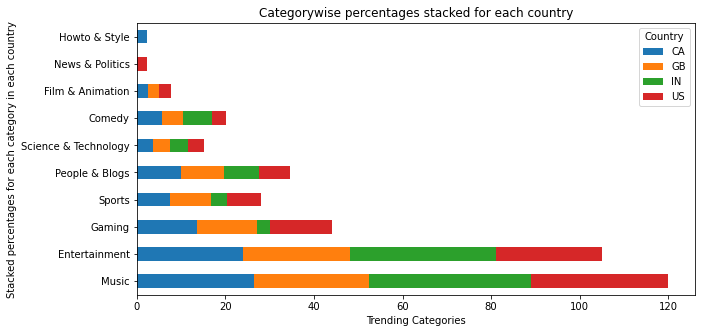

In [42]:

chart_df=pivot_df.transpose()
chart_df=chart_df.sort_values(["US"],ascending=[False])
chart_df.plot(kind="barh", stacked=True,figsize=(10,5))
plt.title("Categorywise percentages stacked for each country")
plt.xlabel("Trending Categories")
plt.ylabel("Stacked percentages for each category in each country")
plt.show()
#chart_df

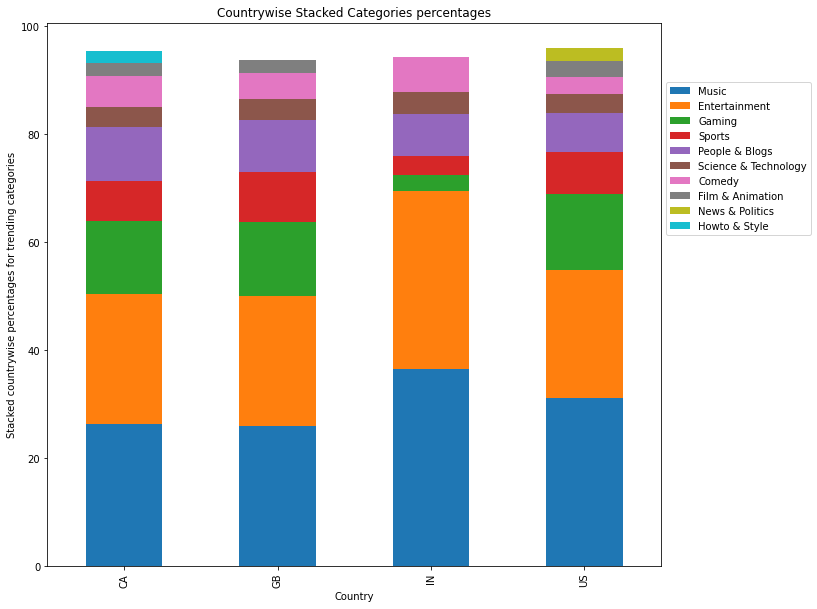

In [50]:

chart_df2=chart_df.transpose()
chart_df2.plot(kind="bar", stacked=True,figsize=(11,10),legend=False)
plt.title("Countrywise Stacked Categories percentages")
plt.legend(loc='center left', bbox_to_anchor=(1, .75))
plt.xlabel("Country")
plt.ylabel("Stacked countrywise percentages for trending categories")

plt.show()
#chart_df2

In [33]:
chart_df.sort_values(["US"],ascending=[False])

Country,CA,GB,IN,US
categoryName,,,,
Music,26.389340,25.960106,36.579553,31.067401
Entertainment,23.947090,24.156648,33.001243,23.855401
Gaming,13.663400,13.576206,2.809049,13.973326
Sports,7.403806,9.250445,3.618834,7.869594
People & Blogs,9.982671,9.765111,7.775461,7.091272
Science & Technology,3.696278,3.853939,4.046839,3.637814
Comedy,5.690936,4.733872,6.506560,3.167321
Film & Animation,2.493234,2.423021,NaN,2.864013
News & Politics,NaN,NaN,NaN,2.370001
